## Part B : *Hands-On Activity*

## Question:

Given an (NxN) size kernel, with N odd. What is the padding you should use to produce a result image with the same size as the input image.

(N div 2) 

## Problem 1:

Apply each one of the following filters (Sharpen, Edge detector and Gaussian Blur) to the "flower.jpg" image and display the results.

Sharpen = $
 \begin{pmatrix}
   0 & -1 &  0 \\
  -1 &  5 & -1 \\
   0 & -1 &  0
 \end{pmatrix}$

Edge detection = $
 \begin{pmatrix}
  -1 & -1 & -1 \\
  -1 &  8 & -1 \\
  -1 & -1 & -1
 \end{pmatrix}$

Gaussian blur = $\frac{1}{16}
 \begin{pmatrix}
  1 & 2 & 1 \\
  2 & 4 & 2 \\
  1 & 2 & 1
 \end{pmatrix}$

In [1]:
try :
  # In Google Colab
  %tensorflow_version 2.x
except :
  pass

# Import Tensorflow
import tensorflow as tf

# Assure TensorFlow version >= 2 is installed. Otherwise install TensorFlow 2.0 version.
try :
  assert tf.__version__ >= "2.0"
  print ("TensorFlow version found:", tf.__version__)
except :
  !pip install tensorflow==2.4

# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # Set the font size of the labels in the plot.

TensorFlow version found: 2.8.0


(1, 427, 640, 3)
(3, 3, 3, 3)
(1, 427, 640, 3)


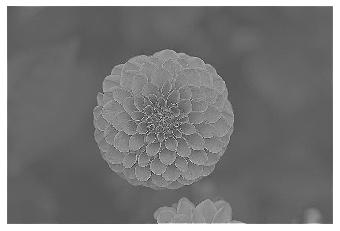

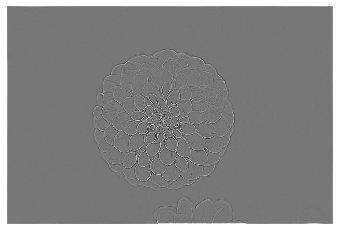

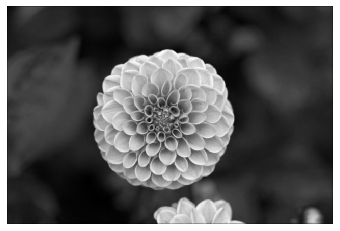

In [3]:
from sklearn.datasets import load_sample_image

# Plot grayscale image.
def plot_image(image):
    plt.imshow(image, cmap = "gray", interpolation = "nearest")
    plt.axis("off")

# Plot color image.
def plot_color_image(image):
    plt.imshow(image, interpolation = "nearest")
    plt.axis("off")

# Load the flower.jpg image.
flower1 = load_sample_image("flower.jpg") / 255.0
flower = np.array([flower1])
print (flower.shape)
# Write your code here.

sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
blur = 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])

sharpen = np.repeat(sharpen[:, :, np.newaxis], 3, axis=2) # same kernel for each channel
edge = np.repeat(edge[:, :, np.newaxis], 3, axis=2)
blur = np.repeat(blur[:, :, np.newaxis], 3, axis=2)

kernels = np.array([sharpen,edge,blur]) # Putting it all in one array
kernels = np.moveaxis(kernels,0,-1) #changing the axes do that kernels = [image_x,image_y,channel,filter]
print(kernels.shape)
output = tf.nn.conv2d(flower, kernels, strides = 1, padding = "SAME")
print(output.shape)


plot_image(output[0,:,:,0])
plt.show()
plot_image(output[0,:,:,1])
plt.show()
plot_image(output[0,:,:,2])
plt.show()

## Problem 2:

Buit a Convolutional Neural Network to classify the images in [CIFAR10](https://keras.io/datasets/) dataset.

- Evaluate the performance of your model on the test set.
- What is the predicted class for the first 10 images of the test set? Does it match with the ground truth values?

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size = 0.1, random_state = 42)

categories = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

x_train_scaled = x_train/255.0
x_valid_scaled = x_valid/255.0
x_test_scaled = x_test/255.0

y_train = to_categorical(y_train) 
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.20)) 
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(10, activation = 'softmax'))

model.summary()
early_stopping = EarlyStopping(patience = 50, restore_best_weights = True)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 200, batch_size = 128,validation_data = (x_valid_scaled, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

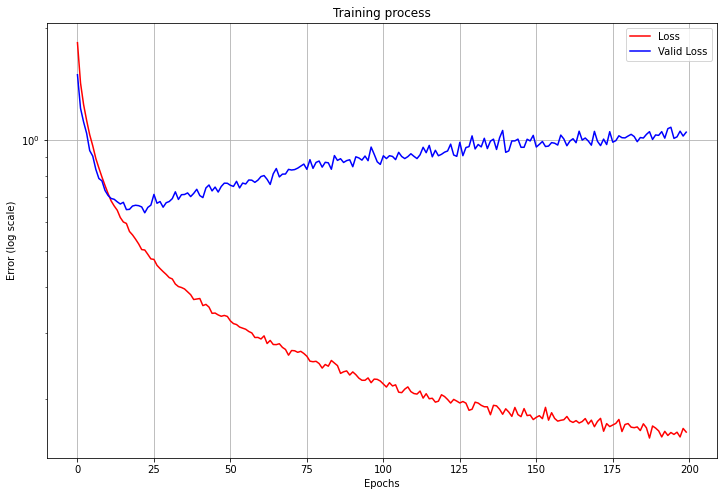

In [9]:
fig = plt.figure( figsize = (12,8) )

plt.title( "Training process" )
plt.plot( history.history["loss"],     "r-", label = "Loss")
plt.plot( history.history["val_loss"], "b-", label = "Valid Loss")

plt.ylabel("Error (log scale)")
plt.xlabel("Epochs")

# Use log scale for the y-axis.
plt.yscale("log")

plt.grid()
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print ("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.0982 - accuracy: 0.7818
Test accuracy: 0.7817999720573425


cat


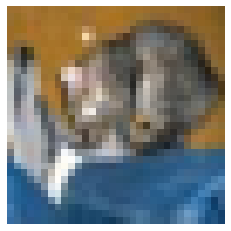

ship


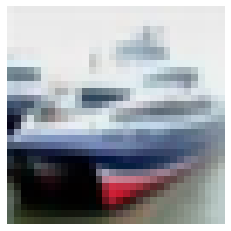

ship


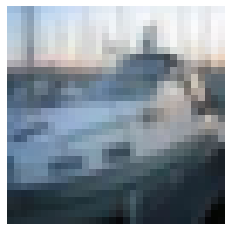

airplane


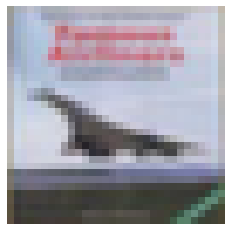

frog


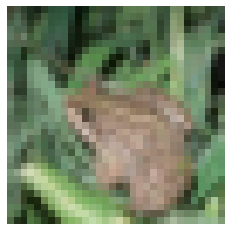

frog


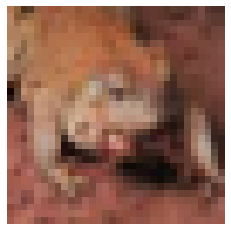

automobile


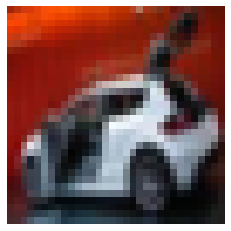

frog


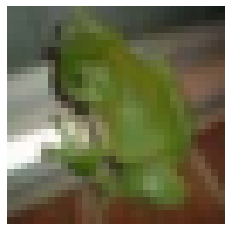

cat


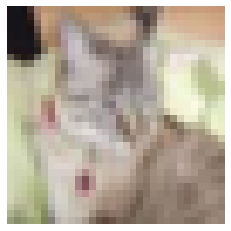

automobile


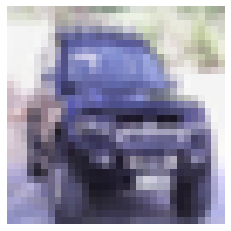

In [10]:
for i in range(10):
  plot_color_image(x_test_scaled[i])
  print( categories[np.argmax(model.predict( np.array([x_test_scaled[i]]) )) ] )
  plt.show()

#Comments:#

* This dataset tends to make the model overfit very quickly. Therefore I used some dropout layers, which increase the accuracy by about 6-7%

* The validation error graph shows the model started overfitting ofter the 30th epoch, however this is not reflected in the output of model.fit in the previous cell. The output suggests the the model slowly kept converging. I am not sure why this is happening.

